In [1]:
%load_ext watermark
%watermark -a Chan -d -v -p numpy,pandas,konlpy,tensorflow,matplotlib

Chan 2019-08-14 

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
konlpy 0.5.1
tensorflow 1.13.1
matplotlib 3.1.0


In [1]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow import keras
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
import pickle

# Load datasets

In [2]:
datasets = pd.read_csv("../../data/train.csv", engine='python', encoding='utf-16')

In [8]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 4 columns):
Unnamed: 0    27000 non-null int64
comment       27000 non-null object
url_id        27000 non-null int64
label         27000 non-null int64
dtypes: int64(3), object(1)
memory usage: 843.8+ KB


In [9]:
datasets.head()

,Unnamed: 0,comment,url_id,label
0,0,ㅜㅜ,77,0
1,1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,17,0
2,2,헐,52,0
3,3,제시,75,0
4,4,이거인 듯,18,0


In [10]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 4 columns):
Unnamed: 0    27000 non-null int64
comment       27000 non-null object
url_id        27000 non-null int64
label         27000 non-null int64
dtypes: int64(3), object(1)
memory usage: 843.8+ KB


# 모든 채팅
## 형태소분석

In [10]:
morp = Okt()

In [12]:
morped = str()
for _ in tqdm(datasets.comment):
    tmp = morp.pos(_, norm=True, stem=True)
    for __ in tmp:
        if __[1] in ['KoreanParticle', 'Noun', 'Adjective']:
            morped += __[0]+'\n'

100%|███████████████████████████████████████████████████████████████████████████| 27000/27000 [01:20<00:00, 333.86it/s]


In [13]:
from wordcloud import WordCloud

In [14]:
wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800,
              background_color='white').generate(morped)

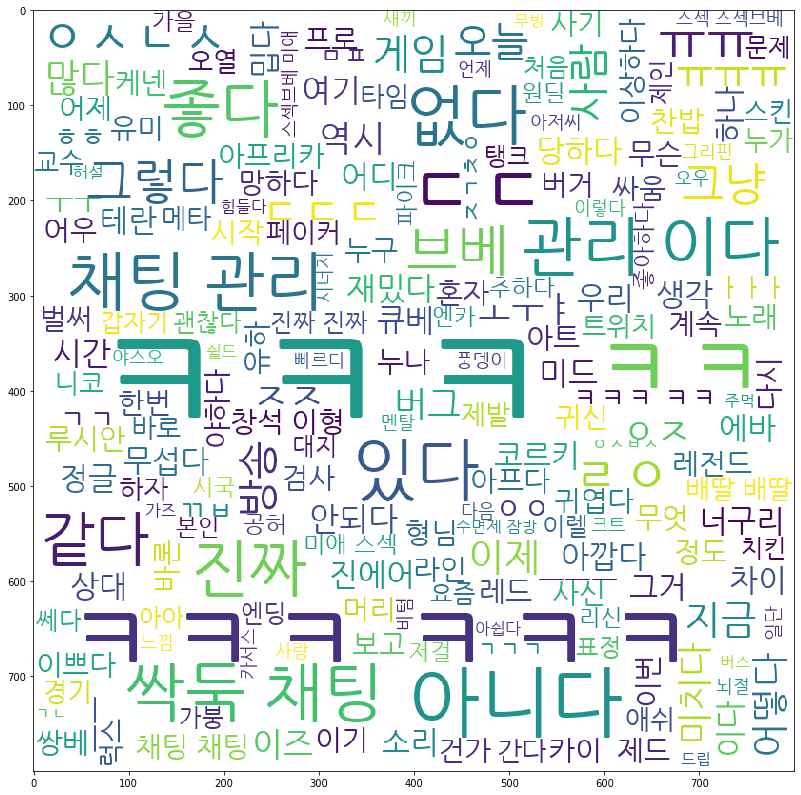

In [15]:
fig = plt.figure(figsize=(14,14))
plt.imshow(wc)

In [16]:
# fig.savefig('../../img/all_wordcloud.png')

# 모델이 유해하다고 분류한 채팅

In [5]:
# load model
up_model = keras.models.load_model('../model/cnn_oversample.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [3]:
from utils.morp_preprocessing import chat_to_morp

In [6]:
padded = chat_to_morp(datasets.comment)


100%|███████████████████████████████████████████████████████████████████████████| 27000/27000 [00:49<00:00, 549.38it/s]


In [7]:
datasets['predict_up'] = up_model.predict_classes(padded)

In [8]:
predicted = datasets[datasets.predict_up==1].comment

In [11]:
bad_morped = str()
for _ in tqdm(predicted):
    tmp = morp.pos(_, norm=True, stem=True)
    for __ in tmp:
        if __[1] in ['KoreanParticle', 'Noun', 'Adjective']:
            bad_morped += __[0]+'\n'

100%|█████████████████████████████████████████████████████████████████████████████| 1988/1988 [00:04<00:00, 421.52it/s]


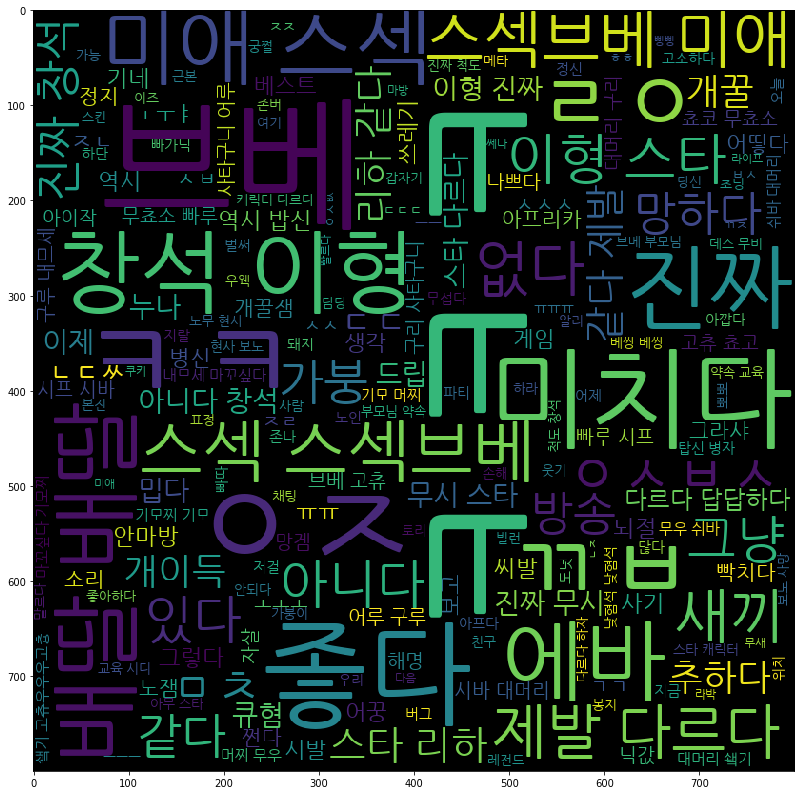

In [14]:
bad_wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800).generate(bad_morped)

fig = plt.figure(figsize=(14,14))
plt.imshow(bad_wc)

In [15]:
fig.savefig('../../img/predictied_bad_wordcloud.png')